In [1]:
import numpy as np
import pandas as pd
import re
from keras.models import Sequential,load_model
from keras.layers import Dense,Embedding
from keras.layers import LSTM,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import fasttext

Using TensorFlow backend.


In [2]:
data=pd.read_csv('offensiveMemes.csv')
data.text_corrected=data.text_corrected.astype(str)
data["text_corrected"]= data["text_corrected"].str.lower() 
class_a=data[data.offensive=='not_offensive']
class_b=data[data.offensive=='slight']
class_c=data[data.offensive=='very_offensive']
class_d=data[data.offensive=='hateful_offensive']

datan=class_a.sample(200).reset_index() 
datan=datan.append(class_b.sample(200).reset_index())
datan=datan.append(class_c.sample(200).reset_index())
datan=datan.append(class_d.sample(200).reset_index())

print(datan.shape)



(800, 5)


In [3]:
datan=datan[['text_corrected','offensive']]

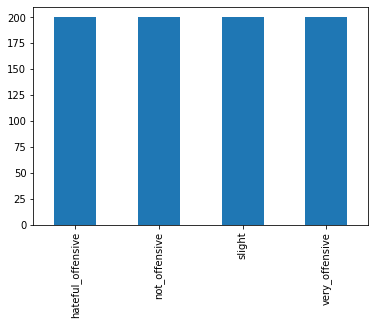

In [4]:
datan['offensive'].value_counts().sort_index().plot.bar()

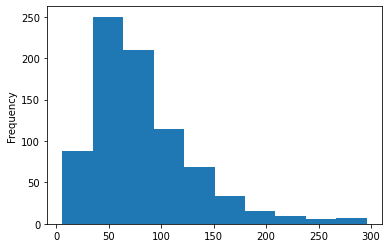

In [5]:
datan['text_corrected'].str.len().plot.hist()

In [6]:
#cleaning the text
##data['text_corrected'].apply(lambda x:x.lower())
datan['text_corrected'] = datan['text_corrected'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
datan.tail()

,text_corrected,offensive
195,what are your plans after the war got a job wi...,hateful_offensive
196,they said i could become anything solbecame a ...,hateful_offensive
197,when she looks perfect,hateful_offensive
198,after you check snapchat and see the whole squ...,hateful_offensive
199,if being a racist means i dont want my country...,hateful_offensive


In [7]:
tokenizer = Tokenizer(num_words=350, split=" ")
tokenizer.fit_on_texts(datan['text_corrected'].values)


In [8]:
X = tokenizer.texts_to_sequences(datan['text_corrected'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          8,  88,  94,  34,   1, 303,  62,  10,  15,   7,  31,  54,  84,
         26,  40,  35,  23],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  22, 254,  81],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  10, 128, 221, 175,  34, 222, 128, 221, 175,  34,  76,   1,
        149, 128, 221, 175],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         18, 304,  20, 305,   1,  37,  76,   1, 106,   6,  22,  18, 304,
         20, 305,   5, 223],
       [

In [9]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))

model.add(Dense(4, activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 43, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 43, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 2,331,652
Trainable params: 2,331,652
Non-trainable params: 0
_________________________________________________________________


In [11]:
y = pd.get_dummies(datan['offensive']).values
[print(data['offensive'][i], y[i]) for i in range(0,5)]


not_offensive [0 1 0 0]
not_offensive [0 1 0 0]
not_offensive [0 1 0 0]
very_offensive [0 1 0 0]
very_offensive [0 1 0 0]


[None, None, None, None, None]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
model.fit(X,y,epochs=5,batch_size=32,verbose=2)

/Users/askvyas/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
 - 11s - loss: 1.3864 - accuracy: 0.2763
Epoch 2/5
 - 10s - loss: 1.3849 - accuracy: 0.2837
Epoch 3/5
 - 11s - loss: 1.3721 - accuracy: 0.3350
Epoch 4/5
 - 10s - loss: 1.3244 - accuracy: 0.3787
Epoch 5/5
 - 9s - loss: 1.2634 - accuracy: 0.4162


In [14]:
model1=load_model('/Users/askvyas/Documents/Sentiment Analysis/sentiment_analysis.h5')

In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 33, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_n=Sequential()

In [17]:
for layer in model1.layers[:-1]: # go through until last layer
    model_n.add(layer)


In [18]:
model_n.add(Dense(4, activation='softmax'))


ValueError: Error when checking input: expected embedding_1_input to have shape (33,) but got array with shape (60,)

In [19]:
transfer_1=load_model('/Users/askvyas/Documents/Sentiment Analysis/sentiment_analysis.h5')

In [20]:
tmp=Sequential()

In [21]:
tmp.add(Embedding(5000, 256, input_length=X.shape[1]))


In [22]:
tmp.add(transfer_1.get_layer(index=1))

In [23]:
tmp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 43, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
Total params: 1,280,000
Trainable params: 1,280,000
Non-trainable params: 0
_________________________________________________________________


In [24]:
tmp.add(transfer_1.get_layer(index=2))

In [25]:
tmp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 43, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
lstm_1 (LSTM)                multiple                  525312    
Total params: 1,805,312
Trainable params: 1,805,312
Non-trainable params: 0
_________________________________________________________________


In [26]:
tmp.add(transfer_1.get_layer(index=3))

In [27]:
tmp.add(Dense(4, activation='softmax'))
tmp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [28]:
tmp.fit(X,y,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
 - 11s - loss: 1.4051 - accuracy: 0.2562
Epoch 2/5
 - 10s - loss: 1.3919 - accuracy: 0.2600
Epoch 3/5
 - 10s - loss: 1.3667 - accuracy: 0.3113
Epoch 4/5
 - 10s - loss: 1.2974 - accuracy: 0.3825
Epoch 5/5
 - 10s - loss: 1.1824 - accuracy: 0.4550


In [29]:
tmp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 43, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
lstm_1 (LSTM)                multiple                  525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 2,331,652
Trainable params: 2,331,652
Non-trainable params: 0
_________________________________________________________________
